<a href="https://colab.research.google.com/github/gusecuador/tratamientoDatos/blob/main/desafio2/TareaFinalGustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de librerías necesarias

In [2]:
!pip install pandas
!pip install -U plotly

In [3]:

import pandas as pd
dfAtletas=pd.read_excel("https://raw.githubusercontent.com/gusecuador/pruebaFinal/main/Athletes.xlsx")

In [4]:
dfAtletas.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [5]:
dfAtletas.tail()

,Name,NOC,Discipline
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing
11084,ZYZANSKA Sylwia,Poland,Archery


In [6]:
dfAtletas.shape

(11085, 3)

In [7]:
dfAtletas.describe()

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,GANNA Filippo,United States of America,Athletics
freq,2,615,2068


In [8]:
dfAtletasNoUnicos=dfAtletas.groupby(['Name','NOC']).size().reset_index(name='cantidad')
dfAtletasNoUnicos=dfAtletasNoUnicos[dfAtletasNoUnicos['cantidad'] > 1]
dfAtletasNoUnicos=pd.merge(dfAtletas,dfAtletasNoUnicos,on="Name")

**Atletas que participaron en más de una disciplina en Tokyo 2020**

In [9]:
dfAtletasNoUnicos.head(30)

,Name,NOC_x,Discipline,NOC_y,cantidad
0,ALI Mohamed,Bahrain,Handball,Bahrain,2
1,ALI Mohamed,Bahrain,Handball,Bahrain,2
2,CHEN Yang,People's Republic of China,Athletics,People's Republic of China,2
3,CHEN Yang,People's Republic of China,Hockey,People's Republic of China,2
4,DYGERT Chloe,United States of America,Cycling Road,United States of America,2
5,DYGERT Chloe,United States of America,Cycling Track,United States of America,2
6,GANNA Filippo,Italy,Cycling Road,Italy,2
7,GANNA Filippo,Italy,Cycling Track,Italy,2
8,HAVIK Yoeri,Netherlands,Cycling Road,Netherlands,2
9,HAVIK Yoeri,Netherlands,Cycling Track,Netherlands,2


In [10]:
dfAtletasNoUnicos.shape

(28, 5)

**Cantidad de Atletas por disciplina**

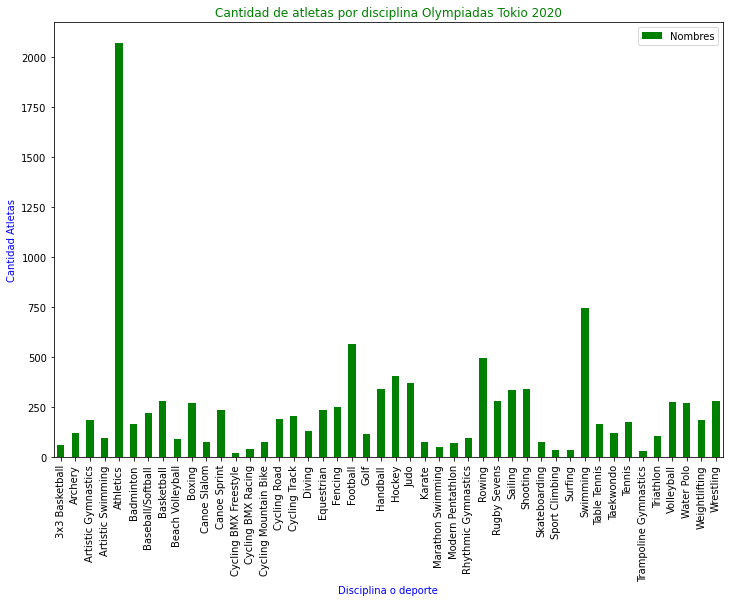

In [11]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
dfAtletas = dfAtletas.rename(columns={'NOC':'Pais','Name':'Nombres'})
dfAtletas.groupby('Discipline')['Nombres'].count().plot(kind='bar',legend='reverse',color='g')
plt.xlabel('Disciplina o deporte',color='b')
plt.ylabel('Cantidad Atletas',color='b')
plt.title('Cantidad de atletas por disciplina Olympiadas Tokio 2020',color='g')
plt.savefig('cantidadAtletasPorDisciplina.png') 
plt.show()


**Cantidad de atletas por disciplina utilizando plotly**

In [12]:
import plotly.express as px
import matplotlib.pyplot as plt
dfAtletasPorDisciplina=dfAtletas.groupby(['Discipline']).size().reset_index(name='cantidad')

fig = px.pie(dfAtletasPorDisciplina, values='cantidad', names='Discipline', title='Cantidad de atletas por disciplina en Olimpiadas Tokio 2020')
fig.show()




In [13]:
dfAtletasPorDisciplina.head()

,Discipline,cantidad
0,3x3 Basketball,62
1,Archery,122
2,Artistic Gymnastics,187
3,Artistic Swimming,98
4,Athletics,2068


In [14]:
dfAtletas.head()

,Nombres,Pais,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


**Cantidad de atletas por país en Olimpiadas Tokyo 2020**

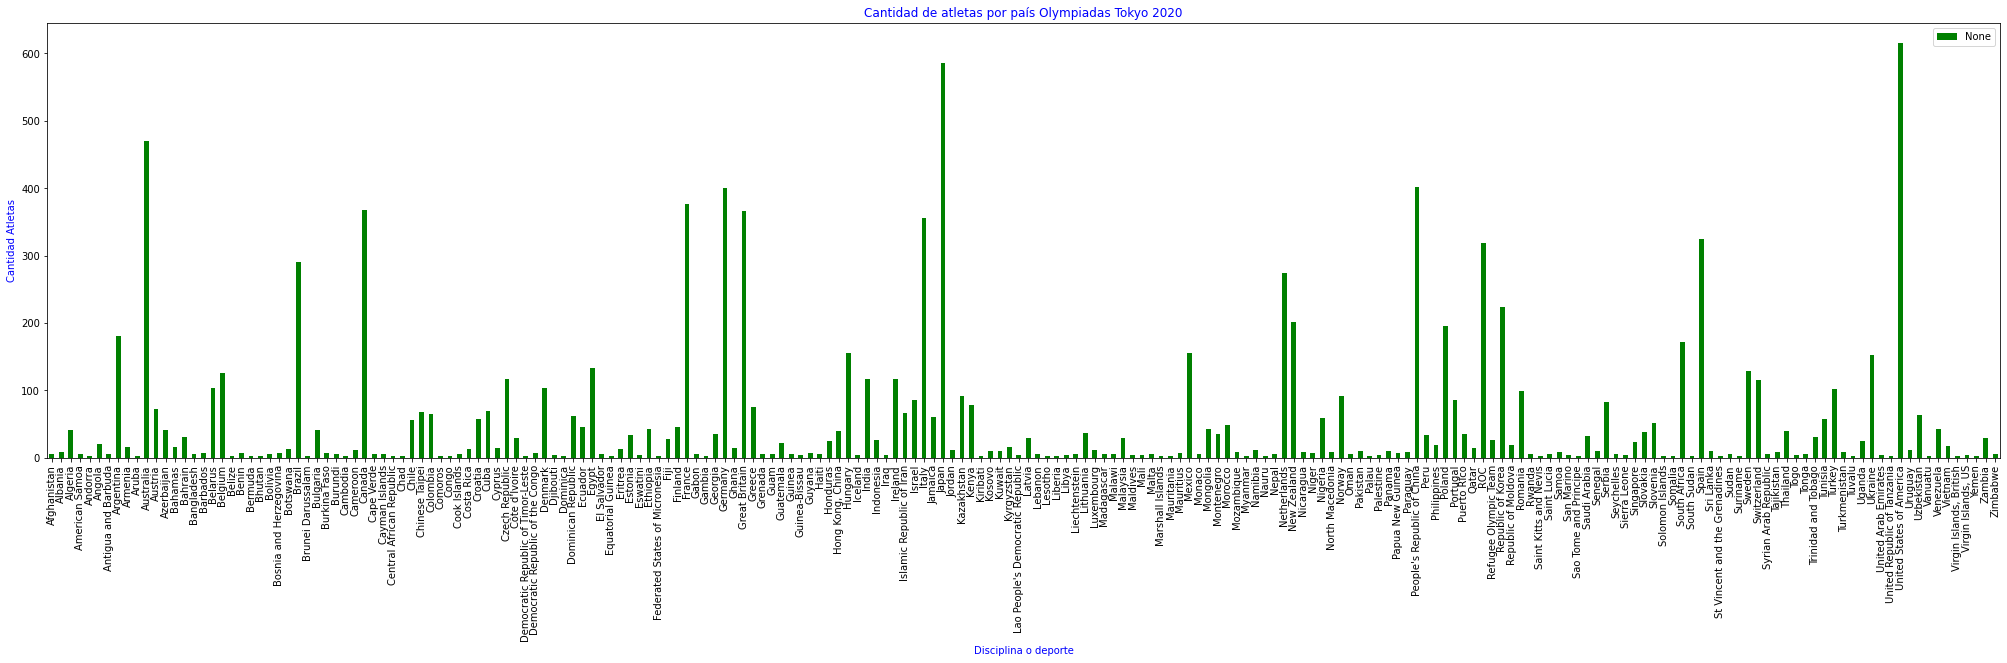

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,8))

dfAtletas.groupby('Pais').size().plot(kind='bar',legend='reverse',color='g')
plt.xlabel('Disciplina o deporte',color='b')
plt.ylabel('Cantidad Atletas',color='b')
plt.title('Cantidad de atletas por país Olympiadas Tokyo 2020',color='b')

plt.savefig('cantidadAtletasPorDisciplina.png') 
plt.show()

In [21]:
import plotly.express as px
import matplotlib.pyplot as plt
cantidad=38
dfAtletasPorPais=dfAtletas.groupby(['Pais']).size().reset_index(name='cantidad').sort_values('cantidad',ascending=False)
dfAtletasPorPaisTop=dfAtletasPorPais.head(cantidad)
sumaOtros=dfAtletasPorPais['cantidad'].sum()-dfAtletasPorPaisTop['cantidad'].sum()
nueva={'Pais':'Otros','cantidad':sumaOtros}
dfAtletasPorPaisTop=dfAtletasPorPaisTop.append(nueva,ignore_index=True)
fig = px.pie(dfAtletasPorPaisTop, values='cantidad', names='Pais', title='Top '+str(cantidad)+ ' de los países con más atletas en Olimpiadas Tokio 2020')
fig.show()

In [22]:
dfAtletasPorPais.head(20)

,Pais,cantidad
195,United States of America,615
94,Japan,586
10,Australia,470
144,People's Republic of China,401
71,Germany,400
67,France,377
33,Canada,368
73,Great Britain,366
92,Italy,356
174,Spain,324


In [23]:
dfAtletasPorPais.iloc[:,1].sum()

11085

In [24]:
sumaOtros

2731

In [26]:
dfAtletasPorPais.shape

(206, 2)

In [27]:
dfAtletasPorPais.head(10).sort_values('cantidad',ascending=False)

,Pais,cantidad
195,United States of America,615
94,Japan,586
10,Australia,470
144,People's Republic of China,401
71,Germany,400
67,France,377
33,Canada,368
73,Great Britain,366
92,Italy,356
174,Spain,324


In [28]:
dfAtletasPorPais.shape

(206, 2)

**Medallas obtenidas en Tokyo 2020**

In [30]:
import pandas as pd
dfMedallas=pd.read_excel("https://raw.githubusercontent.com/gusecuador/pruebaFinal/main/Medals.xlsx")

In [31]:
dfMedallas.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


In [32]:
dfMedallas.tail()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77
92,86,Syrian Arab Republic,0,0,1,1,77


In [33]:
dfMedallas.shape

(93, 7)

**Cantidad de medallas obtenidas por país, no necesariamente equivale al ranking finalmente obtenido en Tokyo 2020**

In [44]:
import plotly.express as px
import matplotlib.pyplot as plt
cantidad=38
dfMedallasPorPais=dfMedallas.sort_values('Rank',ascending=True).head(cantidad)
sumaOro=dfMedallas.iloc[:,2].sum()-dfMedallas.iloc[0:cantidad,2].sum()
sumaPlata=dfMedallas.iloc[:,3].sum()-dfMedallas.iloc[0:cantidad,3].sum()
sumaBronce=dfMedallas.iloc[:,4].sum()-dfMedallas.iloc[0:cantidad,4].sum()
sumaTotales=dfMedallas.iloc[:,5].sum()-dfMedallas.iloc[0:cantidad,5].sum()
tamano=dfMedallasPorPais['Total'].count();
nuevaFila={'Rank':cantidad,'Team/NOC':'Otros', 'Gold':sumaOro,'Silver':sumaPlata,'Bronze':sumaBronce,'Total':sumaTotales,'Rank by Total':cantidad}
dfMedallasPorPais=dfMedallasPorPais.append(nuevaFila,ignore_index=True)
fig = px.pie(dfMedallasPorPais, values='Total', names='Team/NOC', title='Top ' + str(cantidad) + ' de países por cantidad de medallas en Olimpiadas Tokyo 2020')
fig.show()



In [35]:
dfMedallasPorPais.head(39)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


**Ranking de cada país en juegos Olympicos Tokio 2020(Cantidad de medallas no equivale necesariamente a ranking obtenido)**

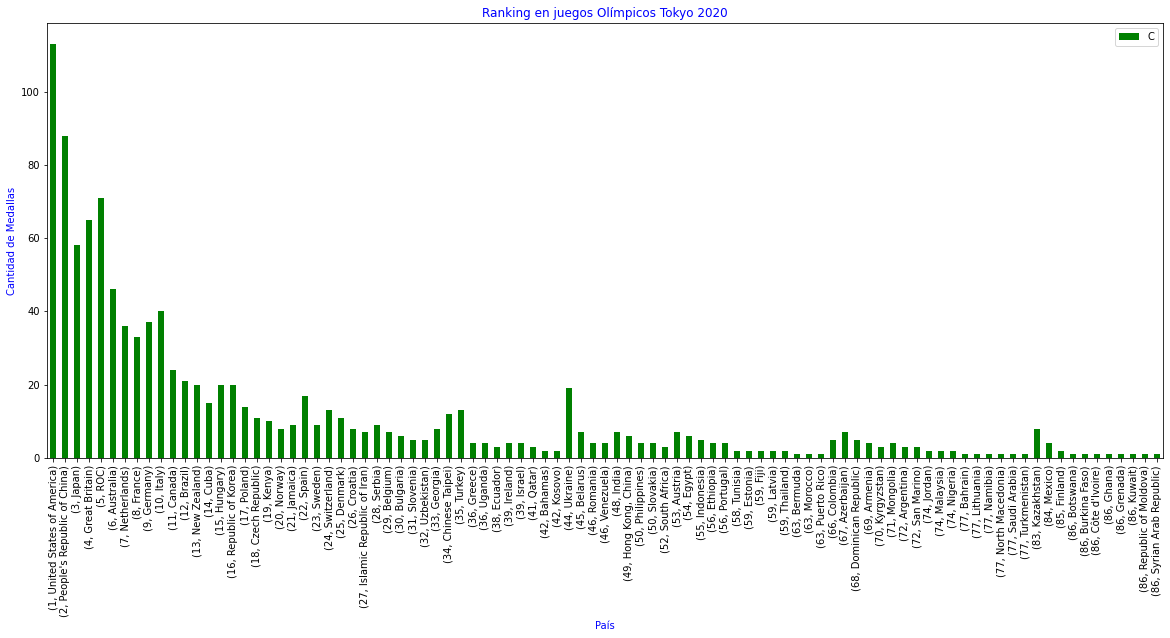

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

dfMedallas.groupby(['Rank','Team/NOC'])['Total'].sum().plot(kind='bar',legend='reverse',color='g')
plt.xlabel('País',color='b')
plt.ylabel('Cantidad de Medallas',color='b')
plt.legend('Cantidad medallas')
plt.title('Ranking en juegos Olímpicos Tokyo 2020',color='b')
plt.show()


**Participación de hombres y mujes en Olimpiadas Tokyo 2020**

In [37]:
import pandas as pd
dfAtletasPorGenero=pd.read_excel("https://raw.githubusercontent.com/gusecuador/pruebaFinal/main/EntriesGender.xlsx")

In [45]:
dfAtletasPorGenero.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [39]:
dfAtletasPorGenero['Female']=pd.to_numeric(dfAtletasPorGenero['Female'])
dfAtletasPorGenero['Male']=pd.to_numeric(dfAtletasPorGenero['Male'])
dfGenero=dfAtletasPorGenero.T
dfGenero=dfGenero.drop(['Discipline'])
dfGenero=dfGenero.drop(['Total'])
dfGenero=dfGenero.reset_index()
dfGenero['Totalizado']=dfGenero.iloc[:,1:].sum(axis=1)
dfGenero.head()


,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,Totalizado
0,Female,32,64,98,105,969,86,90,144,48,102,41,123,10,24,38,70,90,72,73,107,264,60,168,192,192,40,25,36,96,257,146,175,178,40,20,20,361,86,65,94,16,55,144,122,98,96,5432.0
1,Male,32,64,98,0,1072,87,144,144,48,187,41,126,9,24,38,131,99,71,125,108,344,60,168,192,201,42,25,36,0,265,151,175,178,40,20,20,418,86,65,97,16,55,144,146,99,193,5884.0


In [40]:
fig = px.pie(dfGenero, values='Totalizado', names='index', title='Porcentaje de participación de hombres y mujeres en Olimpiadas Tokyo 2020')
fig.show()

In [41]:
pip install nltk

In [95]:
pip install classifier

     |████████████████████████████████| 60 kB 7.5 MB/s 
  Created wheel for classifier: filename=classifier-2.0-py3-none-any.whl size=5056 sha256=fed0f5f7b6592ac091c7b517ba9ad6c63f59046aa2710796c8a8661098c7f1f0
  Stored in directory: /root/.cache/pip/wheels/87/ea/b6/d1ee201ef021c46f0ae8f1d29bf6e6d039807dfa521a092d5d
Successfully built classifier


In [42]:
pip install spanish_sentiment_analysis

     |████████████████████████████████| 15.8 MB 144 kB/s 
     |████████████████████████████████| 1.2 MB 52.1 MB/s 


**Análisis de sentimientos en español, los valores significan seran de 0 a 1.** cuando es 0: negativo; 0.5: neutral ;1: positivo

In [50]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import pandas as pd
from classifier import SentimentClassifier
 
clf = SentimentClassifier()
x="Venid y adoremos a Cristo el Salvador"
y="Es necesario que aprendas a desarrollar para que apliques tus ideas."
z="Ecuador pais amazonico desde siempre y hasta siempre viva la patria"

sentimiento=clf.predict(x)
print(sentimiento)


0.9517439898678763
